<a href="https://colab.research.google.com/github/Aomaphisara/bsc_dpdm22/blob/main/Quiz_Group_5_20_of_Midterm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

เตรียมข้อมูลของ กรม อุตุ ([link](https://drive.google.com/drive/folders/1k6tJcTTv2bKmFz6A5oOWi-sAeTVIQpG4?usp=sharing)) ให้อยู่ในรูปแบบ ตารางด้านล่าง เพื่อเตรียมข้อมูลสำหรับสร้าง Model ทำนาย อุณภูมิต่ำสุดของวันจากค่าอื่นๆ

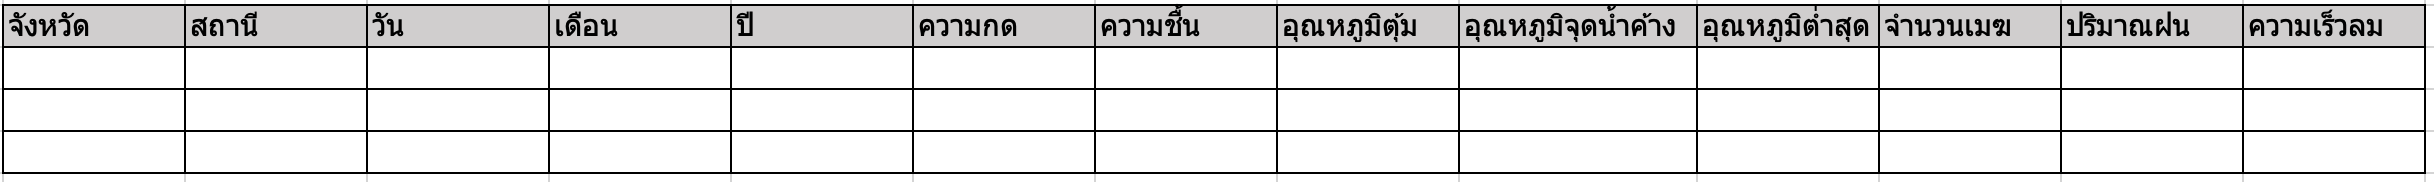

column เดือน-ปี สามารถยุบรวมเป็น 1 column ได้

#Import Data


In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#จังหวัดนครพนม

##อุณหภูมิตุ้มแห้ง

In [ ]:
npk_DL = pd.read_excel('/content/drive/MyDrive/bsc_DMPM_data/อุตุ/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.นครพนม.xlsx')
npk_DL.head(3)

,อุณหภูมิตุ้มแห้ง(เซลเซียส),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34
0,รายวัน,NaN,จ.นครพนม,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ที่,สถานี,เดือน/ปี,วันที่,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,เฉลี่ย


In [ ]:
npk_DL.drop([0,1,2,3], inplace= True) # drop row 1-3
npk_DL.set_axis(['ที่', 'สถานี','วัน/เดือน/ปี','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30','31','เฉลี่ย'], axis='columns', inplace=True) # เปลี่ยนชื่อตาราง
npk_DL.drop(['เฉลี่ย'], axis=1, inplace=True) # drop column 'เฉลี่ย'
npk_DL['จังหวัด'] = 'นครพนม' # เพิ่ม column 'จังหวัด'
npk_DL[['ปี','เดือน','วัน']] = npk_DL["วัน/เดือน/ปี"].apply(lambda x: pd.Series(str(x).split("-"))) #แยก วัน/เดือน/ปี
npk_DL[['จังหวัด', 'สถานี', 'เดือน', 'ปี', '1', '2', '3', '4', '5', '6', '7', '8',
       '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20',
       '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31',]].head(3)

,จังหวัด,สถานี,เดือน,ปี,1,2,3,4,5,6,...,22,23,24,25,26,27,28,29,30,31
4,นครพนม,357201-นครพนม จ.นครพนม,10,2011,25.9,26.1,25.3,24.7,23.1,23.2,...,26.4,27.3,27.9,27.0,27.2,27.1,27.6,25.5,25.8,25.9
5,นครพนม,357201-นครพนม จ.นครพนม,11,2011,25.8,25.8,25.5,26.8,26.5,27.8,...,26.0,25.5,23.7,23.9,24.8,25.2,26.2,26.2,26.2,-
6,นครพนม,357201-นครพนม จ.นครพนม,12,2011,25.4,22.1,20.4,21.3,22.6,23.1,...,22.8,21.6,20.0,17.4,18.0,20.0,22.0,23.9,23.2,21.9


##อุณหภูมิต่ำสุด

In [ ]:
npk_TL = pd.read_excel('/content/drive/MyDrive/bsc_DMPM_data/อุตุ/อุณหภูมิต่ำสุด(เซลเซียส)/จ.นครพนม.xlsx')
npk_TL.head(3)

,อุณหภูมิต่ำสุด(เซลเซียส),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34
0,รายวัน,NaN,จ.นครพนม,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ที่,สถานี,เดือน/ปี,วันที่,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,เฉลี่ย


In [ ]:
npk_TL.drop([0,1,2,3], inplace= True) # drop row 1-3
npk_TL.set_axis(['ที่', 'สถานี','วัน/เดือน/ปี','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30','31','เฉลี่ย'], axis='columns', inplace=True) # เปลี่ยนชื่อตาราง
npk_TL.drop(['เฉลี่ย'], axis=1, inplace=True) # drop column 'เฉลี่ย'
npk_TL['จังหวัด'] = 'นครพนม' # เพิ่ม column 'จังหวัด'
npk_TL[['ปี','เดือน','วัน']] = npk_TL["วัน/เดือน/ปี"].apply(lambda x: pd.Series(str(x).split("-"))) #แยก วัน/เดือน/ปี
npk_TL[['จังหวัด', 'สถานี', 'เดือน', 'ปี', '1', '2', '3', '4', '5', '6', '7', '8',
       '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20',
       '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31',]].head(3)

,จังหวัด,สถานี,เดือน,ปี,1,2,3,4,5,6,...,22,23,24,25,26,27,28,29,30,31
4,นครพนม,357201-นครพนม จ.นครพนม,10,2011,25,23.4,22.2,20.6,21.1,21.0,...,21,22,22.5,22.2,22.2,22.3,23.5,21.5,20.5,21
5,นครพนม,357201-นครพนม จ.นครพนม,11,2011,20.4,20.5,19.7,20.6,21.3,23.7,...,21.5,21.7,19.2,18.8,18.8,19.6,20.4,19.8,20.9,-
6,นครพนม,357201-นครพนม จ.นครพนม,12,2011,19.4,19.8,14.1,14.5,15,18.1,...,17.7,15.8,19.0,13.2,11.6,12.0,14.6,18.6,17.7,15.8


##อุณหภูมิจุดน้ำค้าง

In [ ]:
npk_dew = pd.read_excel('/content/drive/MyDrive/bsc_DMPM_data/อุตุ/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.นครพนม.xlsx')
npk_dew.head(3)

,อุณหภูมิจุดน้ำค้าง(เซลเซียส),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34
0,รายวัน,NaN,จ.นครพนม,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ที่,สถานี,เดือน/ปี,วันที่,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,เฉลี่ย


In [ ]:
npk_dew.drop([0,1,2,3], inplace= True) # drop row 1-3
npk_dew.set_axis(['ที่', 'สถานี','วัน/เดือน/ปี','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30','31','เฉลี่ย'], axis='columns', inplace=True) # เปลี่ยนชื่อตาราง
npk_dew.drop(['เฉลี่ย'], axis=1, inplace=True) # drop column 'เฉลี่ย'
npk_dew['จังหวัด'] = 'นครพนม' # เพิ่ม column 'จังหวัด'
npk_dew[['ปี','เดือน','วัน']] = npk_dew["วัน/เดือน/ปี"].apply(lambda x: pd.Series(str(x).split("-"))) #แยก วัน/เดือน/ปี
npk_dew[['จังหวัด', 'สถานี', 'เดือน', 'ปี', '1', '2', '3', '4', '5', '6', '7', '8',
       '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20',
       '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31',]].head(3)

,จังหวัด,สถานี,เดือน,ปี,1,2,3,4,5,6,...,22,23,24,25,26,27,28,29,30,31
4,นครพนม,357201-นครพนม จ.นครพนม,10,2011,25.1,23.1,20.1,18.9,20.7,21.1,...,19.4,20.0,20.7,20.7,20.8,21.0,20.3,19.8,19.3,19.3
5,นครพนม,357201-นครพนม จ.นครพนม,11,2011,19.2,18.8,19.1,19.8,20.3,20.9,...,20.2,18.1,16.5,17.5,20.2,19.7,19.5,18.6,18.5,-
6,นครพนม,357201-นครพนม จ.นครพนม,12,2011,17.6,12.7,12.2,14.1,16.0,18.5,...,15.7,14.4,10.3,9.0,9.6,13.7,15.8,16,16.2,15.7


##จำนวนเมฆ

In [ ]:
npk_clouds = pd.read_excel('/content/drive/MyDrive/bsc_DMPM_data/อุตุ/จำนวนเมฆ(10ส่วน)/จ.นครพนม.xlsx')
npk_clouds.head(3)

,จำนวนเมฆ(10ส่วน),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34
0,รายวัน,NaN,NaN,จ.นครพนม,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ที่,สถานี,เดือน/ปี,วันที่,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,เฉลี่ย


In [ ]:
npk_clouds.drop([0,1,2,3], inplace= True) # drop row 1-3
npk_clouds.set_axis(['ที่', 'สถานี','วัน/เดือน/ปี','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30','31','เฉลี่ย'], axis='columns', inplace=True) # เปลี่ยนชื่อตาราง
npk_clouds.drop(['เฉลี่ย'], axis=1, inplace=True) # drop column 'เฉลี่ย'
npk_clouds['จังหวัด'] = 'นครพนม' # เพิ่ม column 'จังหวัด'
npk_clouds[['ปี','เดือน','วัน']] = npk_clouds["วัน/เดือน/ปี"].apply(lambda x: pd.Series(str(x).split("-"))) #แยก วัน/เดือน/ปี
npk_clouds[['จังหวัด', 'สถานี', 'เดือน', 'ปี', '1', '2', '3', '4', '5', '6', '7', '8',
       '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20',
       '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31',]].head(3)

,จังหวัด,สถานี,เดือน,ปี,1,2,3,4,5,6,...,22,23,24,25,26,27,28,29,30,31
4,นครพนม,353301-เลย สกษ. จ.เลย,10,2011,10,7,8,8,10,10,...,2,2,2,2,2.0,3,3.0,4,2,4
5,นครพนม,353301-เลย สกษ. จ.เลย,11,2011,2,2,2,3,5,7,...,4,4,4,4,2.0,2,2.0,1,1,-
6,นครพนม,353301-เลย สกษ. จ.เลย,12,2011,2,2,2,4,4,7,...,4,4,2,2,2.0,2,1.0,2,1,1


##ความกด

In [ ]:
npk_pressure = pd.read_excel('/content/drive/MyDrive/bsc_DMPM_data/อุตุ/ความกด(เปอร์เซ็นต์)/จ.นครพนม.xlsx')
npk_pressure.head(3)

,ความกด(เปอร์เซ็นต์),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34
0,รายวัน,NaN,NaN,จ.นครพนม,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ที่,สถานี,เดือน/ปี,วันที่,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,เฉลี่ย


In [ ]:
npk_pressure.drop([0,1,2,3], inplace= True) # drop row 1-3
npk_pressure.set_axis(['ที่', 'สถานี','วัน/เดือน/ปี','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30','31','เฉลี่ย'], axis='columns', inplace=True) # เปลี่ยนชื่อตาราง
npk_pressure.drop(['เฉลี่ย'], axis=1, inplace=True) # drop column 'เฉลี่ย'
npk_pressure['จังหวัด'] = 'นครพนม' # เพิ่ม column 'จังหวัด'
npk_pressure[['ปี','เดือน','วัน']] = npk_pressure["วัน/เดือน/ปี"].apply(lambda x: pd.Series(str(x).split("-"))) #แยก วัน/เดือน/ปี
npk_pressure[['จังหวัด', 'สถานี', 'เดือน', 'ปี', '1', '2', '3', '4', '5', '6', '7', '8',
       '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20',
       '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31',]].head(3)

,จังหวัด,สถานี,เดือน,ปี,1,2,3,4,5,6,...,22,23,24,25,26,27,28,29,30,31
4,นครพนม,352201-หนองคาย จ.หนองคาย,10,2011,1006.3,1007.38,1008.07,1008.44,1010.51,1011.65,...,1011.24,1011.09,1010.64,1012.01,1012.47,1012.46,1012.85,1012.43,1011.69,1012.28
5,นครพนม,352201-หนองคาย จ.หนองคาย,11,2011,1012.28,1011.23,1011.08,1010.96,1010.57,1009.20,...,1014.31,1015.49,1016.09,1014.62,1012.80,1011.83,1010.00,1010.6,1011.13,-
6,นครพนม,352201-หนองคาย จ.หนองคาย,12,2011,1012.15,1013.75,1013.24,1013.94,1013.35,1012.62,...,1014.05,1014.23,1017.58,1019.77,1019.71,1017.34,1017.01,1015.64,1016.89,1017.73


##ความชื้นสัมพัทธ์

In [ ]:
npk_RH = pd.read_excel('/content/drive/MyDrive/bsc_DMPM_data/อุตุ/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.นครพนม.xlsx')
npk_RH.head(3)

,ความชื้นสัมพัทธ์(เปอร์เซ็นต์),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34
0,รายวัน,NaN,จ.นครพนม,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ที่,สถานี,เดือน/ปี,วันที่,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,เฉลี่ย


In [ ]:
npk_RH.drop([0,1,2,3], inplace= True) # drop row 1-3
npk_RH.set_axis(['ที่', 'สถานี','วัน/เดือน/ปี','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30','31','เฉลี่ย'], axis='columns', inplace=True) # เปลี่ยนชื่อตาราง
npk_RH.drop(['เฉลี่ย'], axis=1, inplace=True) # drop column 'เฉลี่ย'
npk_RH['จังหวัด'] = 'นครพนม' # เพิ่ม column 'จังหวัด'
npk_RH[['ปี','เดือน','วัน']] = npk_RH["วัน/เดือน/ปี"].apply(lambda x: pd.Series(str(x).split("-"))) #แยก วัน/เดือน/ปี
npk_RH[['จังหวัด', 'สถานี', 'เดือน', 'ปี', '1', '2', '3', '4', '5', '6', '7', '8',
       '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20',
       '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31',]].head(3) 

,จังหวัด,สถานี,เดือน,ปี,1,2,3,4,5,6,...,22,23,24,25,26,27,28,29,30,31
4,นครพนม,357201-นครพนม จ.นครพนม,10,2011,95,84.0,74.0,72.0,87.0,88.0,...,68.0,66.0,67.0,70.0,69.0,71.0,66.0,72,70,69
5,นครพนม,357201-นครพนม จ.นครพนม,11,2011,69,67.0,70.0,68.0,71.0,68.0,...,72.0,66.0,66.0,70.0,78.0,74.0,69.0,66,65,-
6,นครพนม,357201-นครพนม จ.นครพนม,12,2011,64,56.0,62.0,67.0,69.0,77.0,...,67.0,66.0,54.0,60.0,61.0,70.0,71.0,63,66,70


##ปริมาณฝน

In [ ]:
npk_rain = pd.read_excel('/content/drive/MyDrive/bsc_DMPM_data/อุตุ/ปริมาณฝน(มิลลิเมตร)/จ.นครพนม.xlsx')
npk_rain.head(5)

,ปริมาณฝน(มิลลิเมตร),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34
0,รายวัน,NaN,จ.นครพนม,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ที่,สถานี,เดือน/ปี,วันที่,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,เฉลี่ย
3,NaN,NaN,NaN,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,NaN
4,1,357201-นครพนม จ.นครพนม,2011-10-01 00:00:00,17,0.3,0,0.3,1.9,T,0,...,0,0,0,0,0,0,0,0,0,75.4


In [ ]:
npk_rain.drop([0,1,2,3], inplace= True) # drop row 1-3
npk_rain.set_axis(['ที่', 'สถานี','วัน/เดือน/ปี','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30','31','เฉลี่ย'], axis='columns', inplace=True) # เปลี่ยนชื่อตาราง
npk_rain.drop(['เฉลี่ย'], axis=1, inplace=True) # drop column 'เฉลี่ย'
npk_rain['จังหวัด'] = 'นครพนม' # เพิ่ม column 'จังหวัด'
npk_rain[['ปี','เดือน','วัน']] = npk_rain["วัน/เดือน/ปี"].apply(lambda x: pd.Series(str(x).split("-"))) #แยก วัน/เดือน/ปี
npk_rain[['จังหวัด', 'สถานี', 'เดือน', 'ปี', '1', '2', '3', '4', '5', '6', '7', '8',
       '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20',
       '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31',]].head(3)

,จังหวัด,สถานี,เดือน,ปี,1,2,3,4,5,6,...,22,23,24,25,26,27,28,29,30,31
4,นครพนม,357201-นครพนม จ.นครพนม,10,2011,17,0.3,0,0.3,1.9,T,...,0,0,0,0,0,0,0,0,0,0
5,นครพนม,357201-นครพนม จ.นครพนม,11,2011,0,0,0,0,T,T,...,T,0,0,0,0,0.5,0,0,0,-
6,นครพนม,357201-นครพนม จ.นครพนม,12,2011,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


##ความเร็วลม

In [ ]:
npk_wind = pd.read_excel('/content/drive/MyDrive/bsc_DMPM_data/อุตุ/ความเร็วลม(นอต)/จ.นครพนม.xlsx')
npk_wind.head(5)

,ความเร็วลม(นอต),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34
0,รายวัน,NaN,NaN,จ.นครพนม,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ที่,สถานี,เดือน/ปี,วันที่,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,เฉลี่ย
3,NaN,NaN,NaN,1,2.0,3.0,4,5,6.0,7,...,23.0,24,25,26.0,27.0,28,29,30,31,NaN
4,1,353301-เลย สกษ. จ.เลย,2011-10-01 00:00:00,1,1.0,2.0,2,1,0.0,2,...,1.0,2,2,1.0,2.0,2,1,1,1,1.322581


In [ ]:
npk_wind.drop([0,1,2,3], inplace= True) # drop row 1-3
npk_wind.set_axis(['ที่', 'สถานี','วัน/เดือน/ปี','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30','31','เฉลี่ย'], axis='columns', inplace=True) # เปลี่ยนชื่อตาราง
npk_wind.drop(['เฉลี่ย'], axis=1, inplace=True) # drop column 'เฉลี่ย'
npk_wind['จังหวัด'] = 'นครพนม' # เพิ่ม column 'จังหวัด'
npk_wind[['ปี','เดือน','วัน']] = npk_wind["วัน/เดือน/ปี"].apply(lambda x: pd.Series(str(x).split("-"))) #แยก วัน/เดือน/ปี
npk_wind[['จังหวัด', 'สถานี', 'เดือน', 'ปี', '1', '2', '3', '4', '5', '6', '7', '8',
       '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20',
       '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31',]].head(3) 

,จังหวัด,สถานี,เดือน,ปี,1,2,3,4,5,6,...,22,23,24,25,26,27,28,29,30,31
4,นครพนม,353301-เลย สกษ. จ.เลย,10,2011,1,1.0,2.0,2,1,0.0,...,1,1.0,2,2,1.0,2.0,2,1,1,1
5,นครพนม,353301-เลย สกษ. จ.เลย,11,2011,1,1.0,1.0,1,1,1.0,...,2,3.0,3,2,2.0,1.0,1,1,1,-
6,นครพนม,353301-เลย สกษ. จ.เลย,12,2011,1,2.0,2.0,1,1,1.0,...,1,1.0,3,3,1.0,2.0,1,1,2,2


#จังหวัดขอนแก่น

##ปริมาณฝน

In [ ]:
kk_rain = pd.read_excel('/content/drive/MyDrive/bsc_DMPM_data/อุตุ/ปริมาณฝน(มิลลิเมตร)/จ.ขอนแก่น.xlsx')
kk_rain.head(5)

,ปริมาณฝน(มิลลิเมตร),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34
0,รายวัน,NaN,จ.ขอนแก่น,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ที่,สถานี,เดือน/ปี,วันที่,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,เฉลี่ย
3,NaN,NaN,NaN,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,NaN
4,1,381201-ขอนแก่น จ.ขอนแก่น,2011-10-01 00:00:00,1.4,17.7,3,0,2.2,0.5,1.3,...,0,0,T,0,0.5,1.1,0,0,0,176.8


In [ ]:
kk_rain.drop([0,1,2,3], inplace= True) # drop row 1-3
kk_rain.set_axis(['ที่', 'สถานี','วัน/เดือน/ปี','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30','31','เฉลี่ย'], axis='columns', inplace=True) # เปลี่ยนชื่อตาราง
kk_rain.drop(['เฉลี่ย'], axis=1, inplace=True) # drop column 'เฉลี่ย'
kk_rain['จังหวัด'] = 'ขอนแก่น' # เพิ่ม column 'จังหวัด'
kk_rain[['ปี','เดือน','วัน']] = kk_rain["วัน/เดือน/ปี"].apply(lambda x: pd.Series(str(x).split("-"))) #แยก วัน/เดือน/ปี 
kk_rain[['จังหวัด', 'สถานี', 'เดือน', 'ปี', '1', '2', '3', '4', '5', '6', '7', '8',
       '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20',
       '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31',]].head(3)

,จังหวัด,สถานี,เดือน,ปี,1,2,3,4,5,6,...,22,23,24,25,26,27,28,29,30,31
4,ขอนแก่น,381201-ขอนแก่น จ.ขอนแก่น,10,2011,1.4,17.7,3,0,2.2,0.5,...,0,0,0,T,0,0.5,1.1,0,0,0
5,ขอนแก่น,381201-ขอนแก่น จ.ขอนแก่น,11,2011,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-
6,ขอนแก่น,381201-ขอนแก่น จ.ขอนแก่น,12,2011,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


##ความเร็วลม

In [ ]:
kk_wind = pd.read_excel('/content/drive/MyDrive/bsc_DMPM_data/อุตุ/ความเร็วลม(นอต)/จ.ขอนแก่น.xlsx')
kk_wind.head(3)

,ความเร็วลม(นอต),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34
0,รายวัน,NaN,NaN,จ.ขอนแก่น,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ที่,สถานี,เดือน/ปี,วันที่,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,เฉลี่ย


In [ ]:
kk_wind.drop([0,1,2,3], inplace= True) # drop row 1-3
kk_wind.set_axis(['ที่', 'สถานี','วัน/เดือน/ปี','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30','31','เฉลี่ย'], axis='columns', inplace=True) # เปลี่ยนชื่อตาราง
kk_wind.drop(['เฉลี่ย'], axis=1, inplace=True) # drop column 'เฉลี่ย'
kk_wind['จังหวัด'] = 'ขอนแก่น' # เพิ่ม column 'จังหวัด'
kk_wind[['ปี','เดือน','วัน']] = kk_wind["วัน/เดือน/ปี"].apply(lambda x: pd.Series(str(x).split("-"))) #แยก วัน/เดือน/ปี
kk_wind[['จังหวัด', 'สถานี', 'เดือน', 'ปี', '1', '2', '3', '4', '5', '6', '7', '8',
       '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20',
       '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31',]].head(3) 

,จังหวัด,สถานี,เดือน,ปี,1,2,3,4,5,6,...,22,23,24,25,26,27,28,29,30,31
4,ขอนแก่น,353301-เลย สกษ. จ.เลย,10,2011,3,2.0,3,2.0,2.0,3.0,...,3.0,2.0,3.0,5.0,5.0,5.0,4.0,6,4,5
5,ขอนแก่น,353301-เลย สกษ. จ.เลย,11,2011,4,5.0,3,3.0,5.0,2.0,...,5.0,7.0,6.0,5.0,5.0,3.0,1.0,3,3,-
6,ขอนแก่น,353301-เลย สกษ. จ.เลย,12,2011,3,4.0,4,4.0,4.0,4.0,...,4.0,5.0,6.0,7.0,6.0,5.0,4.0,4,6,5


#จังหวัดหนองคาย

##ปริมาณฝน

In [ ]:
nk_rain = pd.read_excel('/content/drive/MyDrive/bsc_DMPM_data/อุตุ/ปริมาณฝน(มิลลิเมตร)/จ.หนองคาย.xlsx')
nk_rain.head(5)

,ปริมาณฝน(มิลลิเมตร),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34
0,รายวัน,NaN,จ.หนองคาย,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ที่,สถานี,เดือน/ปี,วันที่,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,เฉลี่ย
3,NaN,NaN,NaN,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,NaN
4,1,352201-หนองคาย จ.หนองคาย,2011-10-01 00:00:00,48.6,59,0,1,19.1,6.2,0.2,...,0,0,0,0,0,0,0,0,0,184.3


In [ ]:
nk_rain.drop([0,1,2,3], inplace= True) # drop row 1-3
nk_rain.set_axis(['ที่', 'สถานี','วัน/เดือน/ปี','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30','31','เฉลี่ย'], axis='columns', inplace=True) # เปลี่ยนชื่อตาราง
nk_rain.drop(['เฉลี่ย'], axis=1, inplace=True) # drop column 'เฉลี่ย'
nk_rain['จังหวัด'] = 'หนองคาย' # เพิ่ม column 'จังหวัด'
nk_rain[['ปี','เดือน','วัน']] = nk_rain["วัน/เดือน/ปี"].apply(lambda x: pd.Series(str(x).split("-"))) #แยก วัน/เดือน/ปี
nk_rain[['จังหวัด', 'สถานี', 'เดือน', 'ปี', '1', '2', '3', '4', '5', '6', '7', '8',
       '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20',
       '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31',]].head(3) 

,จังหวัด,สถานี,เดือน,ปี,1,2,3,4,5,6,...,22,23,24,25,26,27,28,29,30,31
4,หนองคาย,352201-หนองคาย จ.หนองคาย,10,2011,48.6,59,0,1,19.1,6.2,...,0,0,0,0,0,0,0,0,0,0
5,หนองคาย,352201-หนองคาย จ.หนองคาย,11,2011,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-
6,หนองคาย,352201-หนองคาย จ.หนองคาย,12,2011,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


##ความเร็วลม

In [ ]:
nk_wind = pd.read_excel('/content/drive/MyDrive/bsc_DMPM_data/อุตุ/ความเร็วลม(นอต)/จ.หนองคาย.xlsx')
nk_wind.head(3)

,ความเร็วลม(นอต),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34
0,รายวัน,NaN,NaN,จ.หนองคาย,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ที่,สถานี,เดือน/ปี,วันที่,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,เฉลี่ย


In [ ]:
nk_wind.drop([0,1,2,3], inplace= True) # drop row 1-3
nk_wind.set_axis(['ที่', 'สถานี','วัน/เดือน/ปี','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30','31','เฉลี่ย'], axis='columns', inplace=True) # เปลี่ยนชื่อตาราง
nk_wind.drop(['เฉลี่ย'], axis=1, inplace=True) # drop column 'เฉลี่ย'
nk_wind['จังหวัด'] = 'หนองคาย' # เพิ่ม column 'จังหวัด'
nk_wind[['ปี','เดือน','วัน']] = nk_wind["วัน/เดือน/ปี"].apply(lambda x: pd.Series(str(x).split("-"))) #แยก วัน/เดือน/ปี
nk_wind[['จังหวัด', 'สถานี', 'เดือน', 'ปี', '1', '2', '3', '4', '5', '6', '7', '8',
       '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20',
       '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31',]].head(3) 

,จังหวัด,สถานี,เดือน,ปี,1,2,3,4,5,6,...,22,23,24,25,26,27,28,29,30,31
4,หนองคาย,353301-เลย สกษ. จ.เลย,10,2011,1,4.0,4.0,2,1.0,3.0,...,2.0,2.0,2.0,3.0,3.0,3.0,3.0,3,3,4
5,หนองคาย,353301-เลย สกษ. จ.เลย,11,2011,3,3.0,3.0,2,2.0,1.0,...,4.0,7.0,4.0,2.0,3.0,2.0,2.0,2,2,-
6,หนองคาย,353301-เลย สกษ. จ.เลย,12,2011,2,5.0,3.0,2,2.0,2.0,...,3.0,3.0,6.0,5.0,4.0,2.0,2.0,2,3,2


#จังหวัดเลย

##ปริมาณฝน

In [ ]:
l_rain = pd.read_excel('/content/drive/MyDrive/bsc_DMPM_data/อุตุ/ปริมาณฝน(มิลลิเมตร)/จ.เลย.xlsx')
l_rain.head(5)

,ปริมาณฝน(มิลลิเมตร),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34
0,รายวัน,NaN,จ.เลย,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ที่,สถานี,เดือน/ปี,วันที่,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,เฉลี่ย
3,NaN,NaN,NaN,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,NaN
4,1,353201-เลย จ.เลย,2011-10-01 00:00:00,21.6,111.4,0.4,0,0,3.4,1.8,...,0,0,0,0,0,0.2,0,0,0,183


In [ ]:
l_rain.drop([0,1,2,3], inplace= True) # drop row 1-3
l_rain.set_axis(['ที่', 'สถานี','วัน/เดือน/ปี','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30','31','เฉลี่ย'], axis='columns', inplace=True) # เปลี่ยนชื่อตาราง
l_rain.drop(['เฉลี่ย'], axis=1, inplace=True) # drop column 'เฉลี่ย'
l_rain['จังหวัด'] = 'เลย' # เพิ่ม column 'จังหวัด'
l_rain[['ปี','เดือน','วัน']] = l_rain["วัน/เดือน/ปี"].apply(lambda x: pd.Series(str(x).split("-")))  #แยก วัน/เดือน/ปี
l_rain[['จังหวัด', 'สถานี', 'เดือน', 'ปี', '1', '2', '3', '4', '5', '6', '7', '8',
       '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20',
       '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31',]].head(3)

,จังหวัด,สถานี,เดือน,ปี,1,2,3,4,5,6,...,22,23,24,25,26,27,28,29,30,31
4,เลย,353201-เลย จ.เลย,10,2011,21.6,111.4,0.4,0,0,3.4,...,0,0,0,0,0,0,0.2,0,0,0
5,เลย,353201-เลย จ.เลย,11,2011,0,0,0,0,0,0,...,0,0,0,0,0,0,0.6,0,0,-
6,เลย,353201-เลย จ.เลย,12,2011,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


##ความเร็วลม

In [ ]:
l_wind = pd.read_excel('/content/drive/MyDrive/bsc_DMPM_data/อุตุ/ความเร็วลม(นอต)/จ.เลย.xlsx')
l_wind.head(3)

,ความเร็วลม(นอต),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34
0,รายวัน,NaN,NaN,จ.เลย,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ที่,สถานี,เดือน/ปี,วันที่,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,เฉลี่ย


In [ ]:
l_wind.drop([0,1,2,3], inplace= True) # drop row 1-3
l_wind.set_axis(['ที่', 'สถานี','วัน/เดือน/ปี','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30','31','เฉลี่ย'], axis='columns', inplace=True) # เปลี่ยนชื่อตาราง
l_wind.drop(['เฉลี่ย'], axis=1, inplace=True) # drop column 'เฉลี่ย'
l_wind['จังหวัด'] = 'เลย' # เพิ่ม column 'จังหวัด'
l_wind[['ปี','เดือน','วัน']] = l_wind["วัน/เดือน/ปี"].apply(lambda x: pd.Series(str(x).split("-"))) #แยก วัน/เดือน/ปี
l_wind[['จังหวัด', 'สถานี', 'เดือน', 'ปี', '1', '2', '3', '4', '5', '6', '7', '8',
       '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20',
       '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31',]].head(3) 

,จังหวัด,สถานี,เดือน,ปี,1,2,3,4,5,6,...,22,23,24,25,26,27,28,29,30,31
4,เลย,353301-เลย สกษ. จ.เลย,10,2011,2,2.0,3.0,2.0,3,2.0,...,1.0,1.0,1,2.0,2.0,1.0,2.0,2,2,1
5,เลย,353301-เลย สกษ. จ.เลย,11,2011,1,2.0,1.0,1.0,2,2.0,...,2.0,3.0,2,1.0,1.0,2.0,1.0,2,1,-
6,เลย,353301-เลย สกษ. จ.เลย,12,2011,2,2.0,3.0,2.0,1,2.0,...,2.0,1.0,2,3.0,2.0,1.0,2.0,1,2,2


#จังหวัดสกลนคร

##ปริมาณฝน

In [ ]:
sk_rain = pd.read_excel('/content/drive/MyDrive/bsc_DMPM_data/อุตุ/ปริมาณฝน(มิลลิเมตร)/จ.สกล.xlsx')
sk_rain.head(5)

,ปริมาณฝน(มิลลิเมตร),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34
0,รายวัน,NaN,จ.สกล,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ที่,สถานี,เดือน/ปี,วันที่,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,เฉลี่ย
3,NaN,NaN,NaN,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,NaN
4,1,356201-สกลนคร จ.สกลนคร,2011-10-01 00:00:00,84.8,28.1,0,T,5.5,0.3,0,...,0,0,0,0,0,0,1,0,0,200.8


In [ ]:
sk_rain.drop([0,1,2,3], inplace= True) # drop row 1-3
sk_rain.set_axis(['ที่', 'สถานี','วัน/เดือน/ปี','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30','31','เฉลี่ย'], axis='columns', inplace=True) # เปลี่ยนชื่อตาราง
sk_rain.drop(['เฉลี่ย'], axis=1, inplace=True) # drop column 'เฉลี่ย'
sk_rain['จังหวัด'] = 'สกลนคร' # เพิ่ม column 'จังหวัด'
sk_rain[['ปี','เดือน','วัน']] = sk_rain["วัน/เดือน/ปี"].apply(lambda x: pd.Series(str(x).split("-"))) #แยก วัน/เดือน/ปี
sk_rain[['จังหวัด', 'สถานี', 'เดือน', 'ปี', '1', '2', '3', '4', '5', '6', '7', '8',
       '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20',
       '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31',]].head(3)

,จังหวัด,สถานี,เดือน,ปี,1,2,3,4,5,6,...,22,23,24,25,26,27,28,29,30,31
4,สกลนคร,356201-สกลนคร จ.สกลนคร,10,2011,84.8,28.1,0,T,5.5,0.3,...,0,0,0,0,0,0,0,1,0,0
5,สกลนคร,356201-สกลนคร จ.สกลนคร,11,2011,0,0,0,0,T,T,...,0,0,0,0,0,0,0,0,0,-
6,สกลนคร,356201-สกลนคร จ.สกลนคร,12,2011,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


##ความเร็วลม

In [ ]:
sk_wind = pd.read_excel('/content/drive/MyDrive/bsc_DMPM_data/อุตุ/ความเร็วลม(นอต)/จ.สกลนคร.xlsx')
sk_wind.head(3)

,ความเร็วลม(นอต),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34
0,รายวัน,NaN,NaN,จ.สกลนคร,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ที่,สถานี,เดือน/ปี,วันที่,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,เฉลี่ย


In [ ]:
sk_wind.drop([0,1,2,3], inplace= True) # drop row 1-3
sk_wind.set_axis(['ที่', 'สถานี','วัน/เดือน/ปี','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30','31','เฉลี่ย'], axis='columns', inplace=True) # เปลี่ยนชื่อตาราง
sk_wind.drop(['เฉลี่ย'], axis=1, inplace=True) # drop column 'เฉลี่ย'
sk_wind['จังหวัด'] = 'สกลนคร' # เพิ่ม column 'จังหวัด'
sk_wind[['ปี','เดือน','วัน']] = sk_wind["วัน/เดือน/ปี"].apply(lambda x: pd.Series(str(x).split("-"))) #แยก วัน/เดือน/ปี
sk_wind[['จังหวัด', 'สถานี', 'เดือน', 'ปี', '1', '2', '3', '4', '5', '6', '7', '8',
       '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20',
       '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31',]].head(3) 

,จังหวัด,สถานี,เดือน,ปี,1,2,3,4,5,6,...,22,23,24,25,26,27,28,29,30,31
4,สกลนคร,353301-เลย สกษ. จ.เลย,10,2011,1,1.0,2.0,2,1.0,0.0,...,1.0,1.0,2.0,2.0,1.0,2.0,2.0,1,1,1
5,สกลนคร,353301-เลย สกษ. จ.เลย,11,2011,1,1.0,1.0,1,1.0,1.0,...,2.0,3.0,3.0,2.0,2.0,1.0,1.0,1,1,-
6,สกลนคร,353301-เลย สกษ. จ.เลย,12,2011,1,2.0,2.0,1,1.0,1.0,...,1.0,1.0,3.0,3.0,1.0,2.0,1.0,1,2,2
